In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
%config InlineBackend.figure_format = 'retina'

import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

# Calculate daily returns for the S&P 100 stocks.

In [2]:
wiki = pd.read_html(io='https://en.wikipedia.org/wiki/S%26P_100')
stocks = (
    yf.download(
        tickers=wiki[2]['Symbol'].replace(to_replace='\.', value='-', regex=True).to_list(), 
        start='2020-01-01', 
        end='2022-08-31', 
        session=session
    )
    .rename_axis(columns=['Variable', 'Ticker'])
)
returns = stocks['Adj Close'].pct_change().dropna()

[                       0%                       ]

[*                      2%                       ]  2 of 101 completed

[*                      2%                       ]  2 of 101 completed

[**                     4%                       ]  4 of 101 completed

[*****                 10%                       ]  10 of 101 completed

[******                13%                       ]  13 of 101 completed

[*******               14%                       ]  14 of 101 completed

[*******               14%                       ]  14 of 101 completed

[********              16%                       ]  16 of 101 completed

[********              17%                       ]  17 of 101 completed

[*********             18%                       ]  18 of 101 completed

[*********             19%                       ]  19 of 101 completed

[**********            20%                       ]  20 of 101 completed

[**********            21%                       ]  21 of 101 completed

[************          24%                       ]  24 of 101 completed

[************          25%                       ]  25 of 101 completed

[*************         28%                       ]  28 of 101 completed

[*************         28%                       ]  28 of 101 completed

[***************       31%                       ]  31 of 101 completed

[***************       32%                       ]  32 of 101 completed

[****************      33%                       ]  33 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[*****************     36%                       ]  36 of 101 completed

[******************    37%                       ]  37 of 101 completed

[******************    38%                       ]  38 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[********************  41%                       ]  41 of 101 completed

[********************  42%                       ]  42 of 101 completed

[********************* 43%                       ]  43 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[**********************45%                       ]  45 of 101 completed

[**********************46%                       ]  46 of 101 completed

[**********************47%                       ]  47 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************49%                       ]  49 of 101 completed

[**********************50%                       ]  50 of 101 completed

[**********************50%                       ]  51 of 101 completed

[**********************51%                       ]  52 of 101 completed

[**********************52%                       ]  53 of 101 completed

[**********************53%                       ]  54 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************55%*                      ]  56 of 101 completed

[**********************55%*                      ]  56 of 101 completed

[**********************57%**                     ]  58 of 101 completed

[**********************58%***                    ]  59 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************63%*****                  ]  64 of 101 completed

[**********************64%******                 ]  65 of 101 completed

[**********************65%******                 ]  66 of 101 completed

[**********************66%*******                ]  67 of 101 completed

[**********************67%*******                ]  68 of 101 completed

[**********************68%********               ]  69 of 101 completed

[**********************69%********               ]  70 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************73%**********             ]  74 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************76%***********            ]  77 of 101 completed

[**********************78%************           ]  79 of 101 completed

[**********************78%************           ]  79 of 101 completed

[**********************80%*************          ]  81 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************82%**************         ]  83 of 101 completed

[**********************83%***************        ]  84 of 101 completed

[**********************84%***************        ]  85 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************86%****************       ]  87 of 101 completed

[**********************87%*****************      ]  88 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************89%******************     ]  90 of 101 completed

[**********************90%******************     ]  91 of 101 completed

[**********************91%*******************    ]  92 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************94%********************   ]  95 of 101 completed

[**********************94%********************   ]  95 of 101 completed

[**********************96%*********************  ]  97 of 101 completed

[**********************97%********************** ]  98 of 101 completed

[**********************98%********************** ]  99 of 101 completed

[**********************99%***********************]  100 of 101 completed

[*********************100%***********************]  101 of 101 completed

# How well do annualized average returns in 2020 predict those in 2021?

In [3]:
df_2 = (
    returns
    .loc['2020':'2021']
    .groupby(lambda x: str(x.year))
    .agg(['mean', 'std'])
    .rename_axis(columns=['Ticker', 'Statistic'])
    .stack(level='Ticker')
    .unstack(level='Date')
)
df_2['mean'] *= 252 * 100
df_2['std'] *= np.sqrt(252) * 100

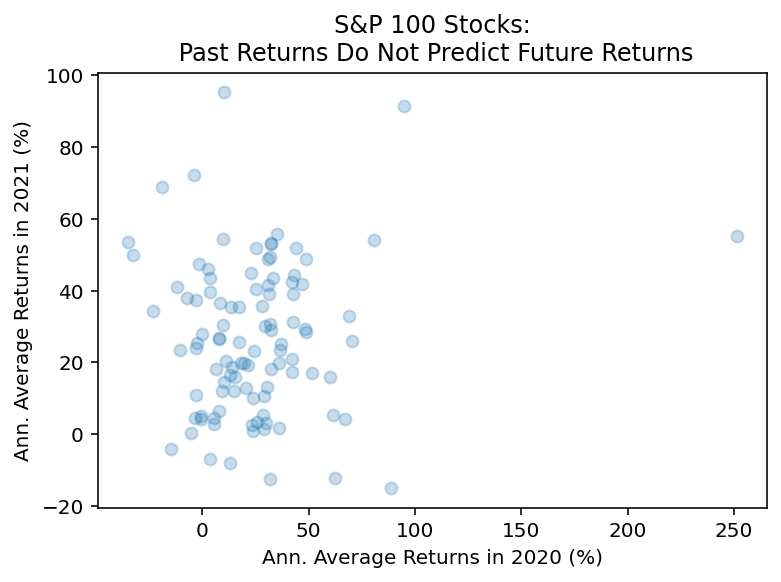

In [4]:
plt.scatter(x=df_2[('mean', '2020')], y=df_2[('mean', '2021')], alpha=0.25)
plt.xlabel('Ann. Average Returns in 2020 (%)')
plt.ylabel('Ann. Average Returns in 2021 (%)')
plt.title('S&P 100 Stocks:\n Past Returns Do Not Predict Future Returns')
plt.show()

In [5]:
df_2['mean'].sort_values('2020').iloc[5:-5].corr().loc['2020', '2021']

-0.0172

# How well do annualized standard deviations of returns in 2020 predict those in 2021?

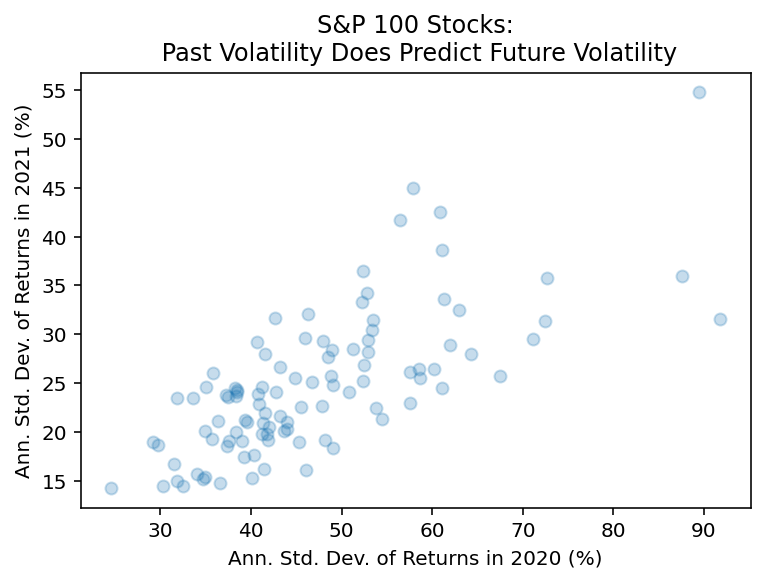

In [6]:
plt.scatter(x=df_2[('std', '2020')], y=df_2[('std', '2021')], alpha=0.25)
plt.xlabel('Ann. Std. Dev. of Returns in 2020 (%)')
plt.ylabel('Ann. Std. Dev. of Returns in 2021 (%)')
plt.title('S&P 100 Stocks:\n Past Volatility Does Predict Future Volatility')
plt.show()

In [7]:
df_2['std'].sort_values('2020').iloc[5:-5].corr().loc['2020', '2021']

0.6280

# What are the mean, median, minimum, and maximum pairwise correlations between two stocks?

In [8]:
corrs = returns.corr()
pairs_to_keep = np.tril(m=corrs, k=-1) != 0
s_4 = corrs.where(pairs_to_keep, np.nan).stack().sort_values()

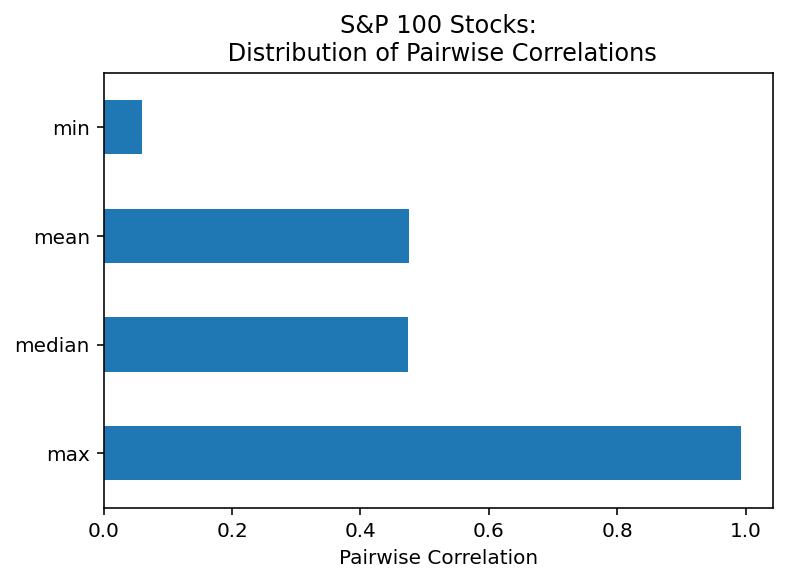

In [9]:
s_4.agg(['min', 'mean', 'median', 'max']).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Pairwise Correlation')
plt.title('S&P 100 Stocks:\n Distribution of Pairwise Correlations')
plt.show()

In [10]:
s_4.iloc[[0, 1, 5050//2, -2, -1]]

Ticker  Ticker
VZ      TSLA     0.0600
TMO     SPG      0.0726
WFC     LMT      0.4736
JPM     BAC      0.9377
GOOGL   GOOG     0.9937
dtype: float64

# Plot annualized average returns versus annualized standard deviations of returns.

In [11]:
df_5 = returns.agg(['mean', 'std']).rename_axis(index='Statistic').T
df_5['mean'] *= 252 * 100
df_5['std'] *= np.sqrt(252) * 100

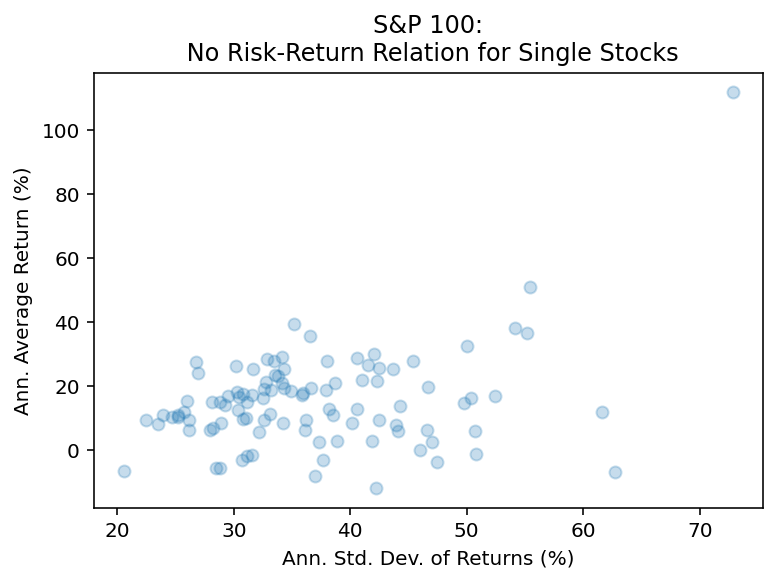

In [12]:
plt.scatter(x=df_5['std'], y=df_5['mean'], alpha=0.25)
plt.ylabel('Ann. Average Return (%)')
plt.xlabel('Ann. Std. Dev. of Returns (%)')
plt.title('S&P 100:\n No Risk-Return Relation for Single Stocks')
plt.show()

In [13]:
df_5.corr().loc['mean', 'std']

0.3494

In [14]:
df_5.sort_values('mean').iloc[5:-5].corr().loc['std', 'mean']

0.0307

In [15]:
import seaborn as sns

<AxesSubplot: xlabel='std', ylabel='mean'>

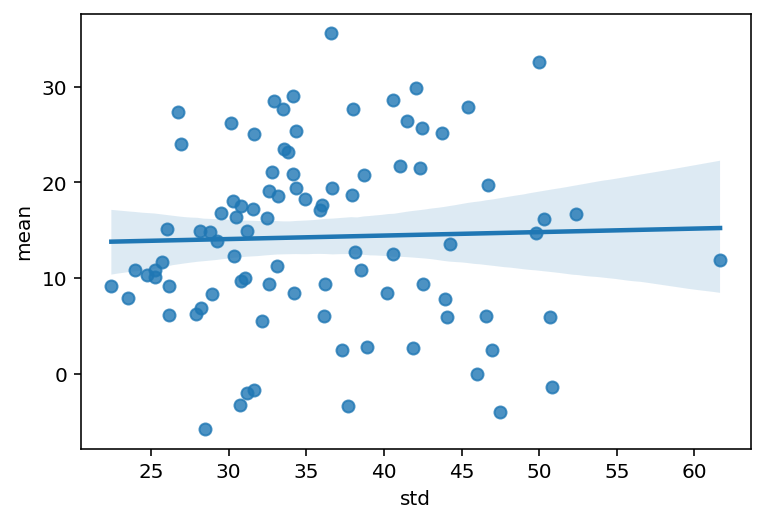

In [16]:
sns.regplot(x='std', y='mean', data=df_5.sort_values('mean').iloc[5:-5])

# Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.

In [17]:
def ports(m=2, n=100, data=returns):
    _ports = [data.sample(n=m, axis=1, random_state=i).mean(axis=1) for i in range(n)]
    return pd.concat(objs=_ports, axis=1, keys=range(1, n+1), names='Number')

In [18]:
sizes = [2, 5, 10, 25]
df_6 = (
    pd.concat(objs=[ports(m=s) for s in sizes], keys=sizes, names=['Size', 'Date'])
    .groupby(level='Size')
    .agg(['mean', 'std'])
    .rename_axis(columns=['Number', 'Statistic'])
    .stack(level='Number')
)
df_6['mean'] *= 252 * 100
df_6['std'] *= np.sqrt(252) * 100

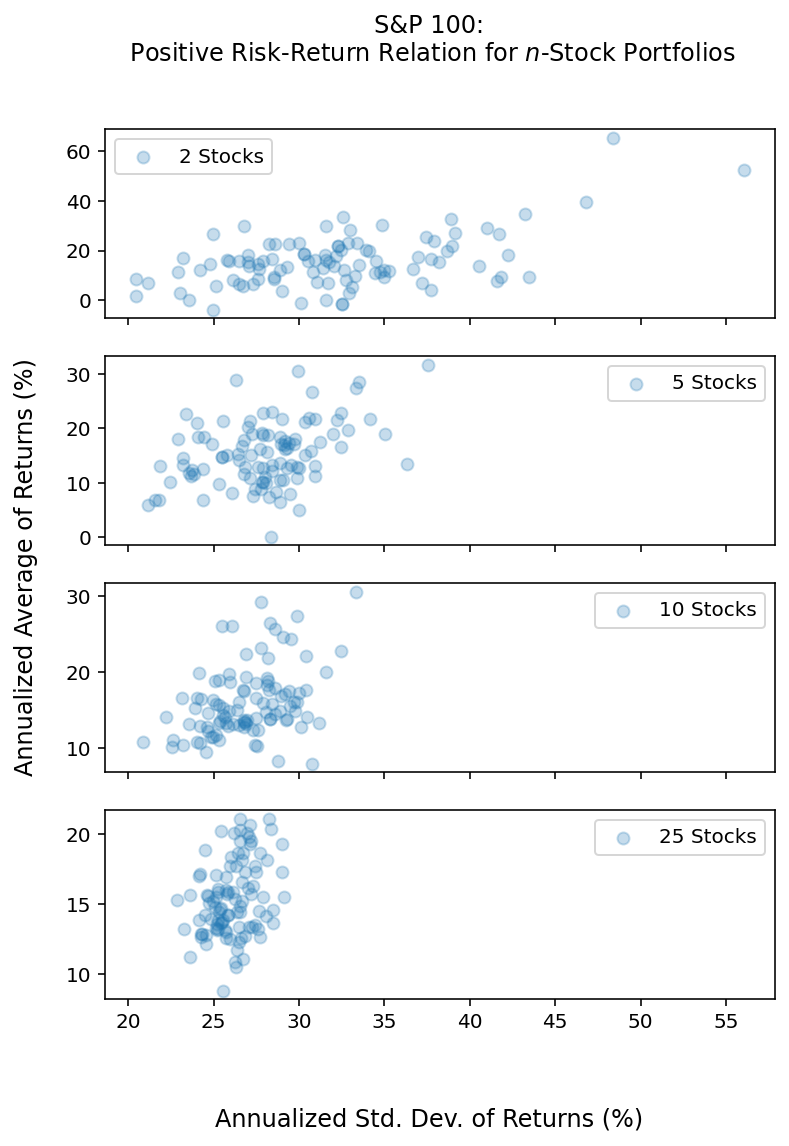

In [19]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
for size, group in df_6.groupby(level='Size'):
    axes[sizes.index(size)].scatter(x=group['std'], y=group['mean'], alpha=0.25)
    axes[sizes.index(size)].legend([f'{size} Stocks'])

fig.supylabel('Annualized Average of Returns (%)')
fig.supxlabel('Annualized Std. Dev. of Returns (%)')
fig.suptitle('S&P 100:\n Positive Risk-Return Relation for $n$-Stock Portfolios')
plt.show()